In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types


Welcome to JupyROOT 6.26/04


In [2]:
base_file_loc = '/media/jykim/T7/storage_b2/storage//massvetov2_pre_1ab_onlybkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_pre_1ab_onlybkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massveto_calib_0614_calib_skim/'


phigamma_ccbar = base_file_loc + 'ccbar/recon_*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
phigamma_ccbar = base_file_loc + 'topo/resultfile/result_kshort/standard.root'

phigamma_uubar = base_file_loc + 'uubar/recon_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_*.root'
phigamma_charged = base_file_loc + 'charged/recon_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_*.root'

In [3]:
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
# # base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.0008 && Dstarp_CMS_p>2.5 && gamma_E>0.48 && Belle2Pi0Veto_75MeV>0.023 '

# # base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5'

# base_filter=' D0_M>1.8 && D0_M<1.9'
base_filter=' D0_M>1.68 && D0_M<2.05 && dM_pi0_75MeV >0.023'
# 
variables=['__experiment__', '__run__', '__event__','__ncandidates__','__candidate__','Dstarp_chiProb','D0_M','D0_cosHel_0','kshort_M','Dstarp_Q','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','D0_flightDistance','D0_flightDistanceErr']
# variables+=['Pi0_Prob','Eta_Prob']
# variables += ['roe_pi0_InvM', 'pi0veto_Easym', 'pi0_soft_cosHelicityAngleMomentum' ,'pi0_veto_isSignal','Belle2Pi0Veto',\
#             'roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
#             'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV',\
#             'roe_pi0_InvM_100MeV', 'pi0veto_Easym_100MeV', 'pi0_soft_cosHelicityAngleMomentum_100MeV' ,'pi0_veto_isSignal_100MeV','Belle2Pi0Veto_100MeV',\
#             'roe_pi0_InvM_125MeV', 'pi0veto_Easym_125MeV', 'pi0_soft_cosHelicityAngleMomentum_125MeV' ,'pi0_veto_isSignal_125MeV','Belle2Pi0Veto_125MeV',\
#             'roe_pi0_InvM_150MeV', 'pi0veto_Easym_150MeV', 'pi0_soft_cosHelicityAngleMomentum_150MeV' ,'pi0_veto_isSignal_150MeV','Belle2Pi0Veto_150MeV',\
#             'roe_pi0_InvM_mask', 'pi0veto_Easym_mask', 'pi0_soft_cosHelicityAngleMomentum_mask' ,'pi0_veto_isSignal_mask','Belle2Pi0Veto_mask','gamma_genMotherPDG']
# variables+=['phi_MVA2']
# variables += ['roe_pi0_InvM', 'pi0veto_Easym', 'pi0_soft_cosHelicityAngleMomentum' ,'pi0_veto_isSignal','Belle2Pi0Veto',\
#               'roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
#             'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV',\
#             'roe_pi0_InvM_mask', 'pi0veto_Easym_mask', 'pi0_soft_cosHelicityAngleMomentum_mask' ,'pi0_veto_isSignal_mask','Belle2Pi0Veto_mask','gamma_genMotherPDG']
ccbar_variables = variables + ['iCascDcyBrP_Dst_0']
tree='kshort'

In [4]:
# pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter + ' && ',variables=variables)


pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=ccbar_variables)
pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [5]:
pd_ccbar = pd_phigamma_ccbar.reset_index(drop=True)
pd_uubar = pd_phigamma_uubar.reset_index(drop=True)
pd_ddbar = pd_phigamma_ddbar.reset_index(drop=True)
pd_ssbar = pd_phigamma_ssbar.reset_index(drop=True)
pd_charged = pd_phigamma_charged.reset_index(drop=True)
pd_mixed = pd_phigamma_mixed.reset_index(drop=True)
pd_taupair = pd_phigamma_taupair.reset_index(drop=True)




In [6]:
pd_ccbar['rank'] = pd_ccbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_uubar['rank'] = pd_uubar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_ddbar['rank'] = pd_ddbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_ssbar['rank'] = pd_ssbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_charged['rank'] = pd_charged.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_mixed['rank'] = pd_mixed.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_taupair['rank'] = pd_taupair.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')

In [7]:
multiplicity = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) / len(pd_ccbar[["__experiment__", "__run__", "__event__"]])

numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

43386
43573
0.9957083515020769


In [8]:
# def cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair):
#     pd_ccbar_after = pd_ccbar.query(cut)
#     pd_uubar_after = pd_uubar.query(cut)
#     pd_ddbar_after = pd_ddbar.query(cut)
#     pd_ssbar_after = pd_ssbar.query(cut)
#     pd_charged_after = pd_charged.query(cut)
#     pd_mixed_after = pd_mixed.query(cut)
#     pd_taupair_after = pd_taupair.query(cut)

#     return pd_ccbar_after, pd_uubar_after , pd_ddbar_after , pd_ssbar_after , \
#         pd_charged_after , pd_mixed_after , pd_taupair_after

In [9]:
cut = 'gamma_E>0.48 & Belle2Pi0Veto_75MeV >0.022'
cut = 'gamma_E>0.0'
# cut = 'rank==1'

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[ 701.  777.  748.  867.  828.  863.  854.  934.  948. 1000. 1023. 1032.
 1064. 1097. 1220. 1463. 1626. 1963. 2308. 2772. 3064. 3179. 3003. 2535.
 1982. 1202.  723.  423.  267.  211.  216.  154.  171.  164.  148.  162.
  153.  165.  142.  131.  140.  124.  126.  136.  111.  123.  140.  133.
  132.  125.]
fitst_bin_entries=701.0


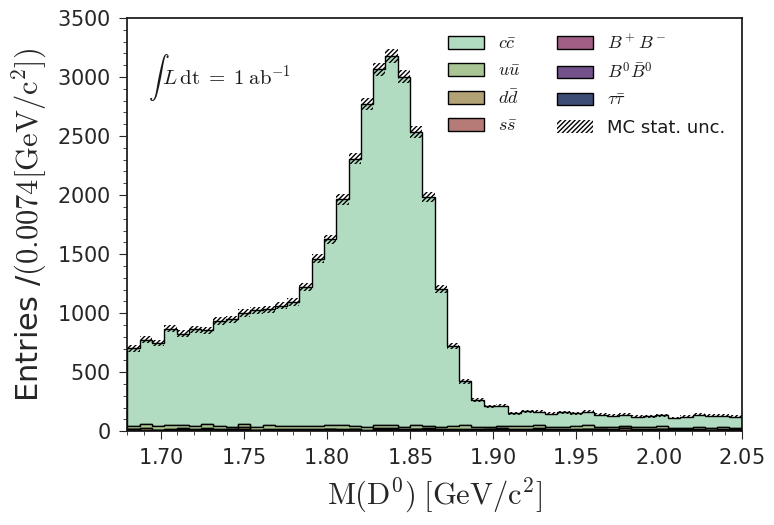

In [10]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$')
# plt.savefig("MC15ri_kshortg_1ab_onlyD0.png")

[ 946.  805.  862.  976. 1026. 1082. 1189. 1135. 1042.  982.  921.  892.
  881.  869.  817.  908.  919.  822.  823.  823.  797.  840.  831.  828.
  838.  782.  859.  863.  836.  876.  797.  929.  867.  790.  840.  842.
  819.  836.  831.  770.  806.  865.  811.  820.  843.  792.  781.  799.
  776.  889.]
fitst_bin_entries=946.0


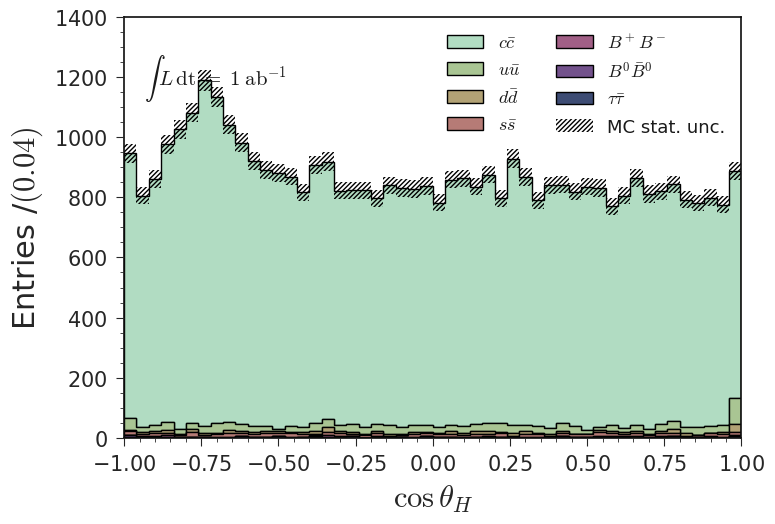

In [11]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_cosHel_0'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (-1,1)
# xrange = (1.8,1.9)

nbins = 50
xlabel = r"$\cos\theta_H$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity='$1\\; \\mathrm{ab}^{-1}$')
# plt.savefig("/media/jykim/T7/saved_plots/DRAW/CALIB/MC15ri/MC15ri_kshortg_1ab_onlyD0_coshel.png")

[4.3035e+04 5.3300e+02 5.0000e+00 0.0000e+00 0.0000e+00]
fitst_bin_entries=43035.0


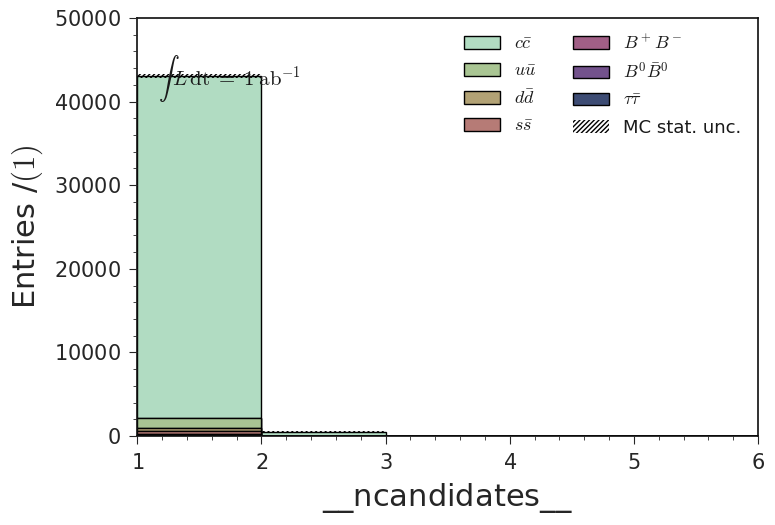

In [12]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = '__ncandidates__'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (1,6)
force_range = (1,6)
# xrange = (1.8,1.9)

nbins = 5
xlabel = "__ncandidates__"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",force_range=force_range,luminosity='$1\\; \\mathrm{ab}^{-1}$')
# plt.savefig("/media/jykim/T7/saved_plots/DRAW/CALIB/MC15ri/MC15ri_kshortg_1ab_ncandidates.png")

[ 946.  805.  862.  976. 1026. 1082. 1189. 1135. 1042.  982.  921.  892.
  881.  869.  817.  908.  919.  822.  823.  823.  797.  840.  831.  828.
  838.  782.  859.  863.  836.  876.  797.  929.  867.  790.  840.  842.
  819.  836.  831.  770.  806.  865.  811.  820.  843.  792.  781.  799.
  776.  889.]
fitst_bin_entries=946.0


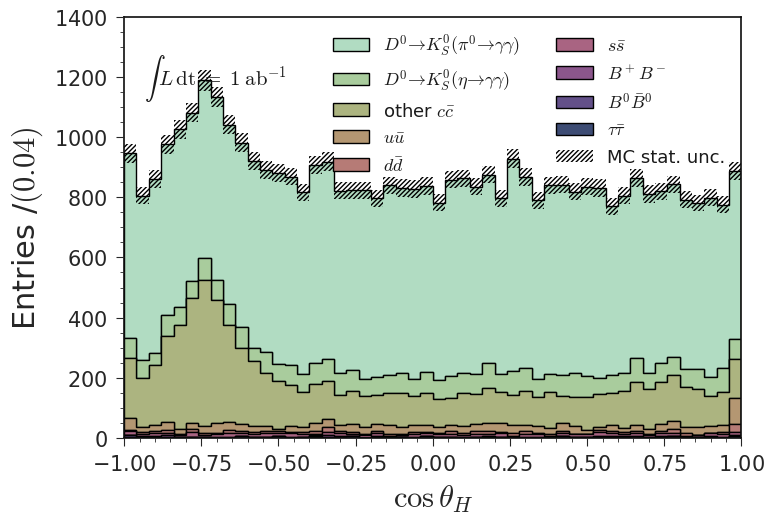

In [61]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$',r'other $c\bar{c}$', r'$D^0 \to K_S^0 (\eta \to \gamma \gamma)$', r'$D^0 \to K_S^0 (\pi^0 \to \gamma \gamma)$']

# data  = taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_cosHel_0'

pd_ccbar_eta = pd_ccbar.query("iCascDcyBrP_Dst_0==1")
pd_ccbar_pi0 = pd_ccbar.query("iCascDcyBrP_Dst_0==0")
pd_ccbar_others = pd_ccbar.query("iCascDcyBrP_Dst_0!=0 & iCascDcyBrP_Dst_0!=1")
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var],pd_ccbar_others[var], pd_ccbar_eta[var], pd_ccbar_pi0[var]]  


scale = 1
xrange = (-1,1)
# xrange = (1.8,1.9)

nbins = 50
xlabel = r"$\cos\theta_H$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity='$1\\; \\mathrm{ab}^{-1}$',ncol=2)
# plt.savefig("/media/jykim/T7/saved_plots/DRAW/CALIB/MC15ri/MC15ri_kshortg_1ab_onlyD0_topo_coshel.png")

[ 701.  777.  748.  867.  828.  863.  854.  934.  948. 1000. 1023. 1032.
 1064. 1097. 1220. 1463. 1626. 1963. 2308. 2772. 3064. 3179. 3003. 2535.
 1982. 1202.  723.  423.  267.  211.  216.  154.  171.  164.  148.  162.
  153.  165.  142.  131.  140.  124.  126.  136.  111.  123.  140.  133.
  132.  125.]
fitst_bin_entries=701.0


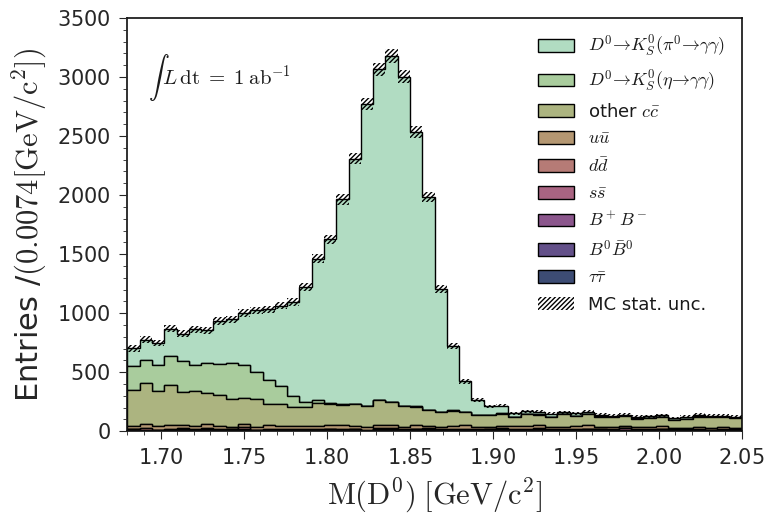

In [14]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$',r'other $c\bar{c}$', r'$D^0 \to K_S^0 (\eta \to \gamma \gamma)$', r'$D^0 \to K_S^0 (\pi^0 \to \gamma \gamma)$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_M'

pd_ccbar_eta = pd_ccbar.query("iCascDcyBrP_Dst_0==1")
pd_ccbar_pi0 = pd_ccbar.query("iCascDcyBrP_Dst_0==0")
pd_ccbar_others = pd_ccbar.query("iCascDcyBrP_Dst_0!=0 & iCascDcyBrP_Dst_0!=1")
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var],pd_ccbar_others[var], pd_ccbar_eta[var], pd_ccbar_pi0[var]]  


scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$',ncol=1)
# plt.savefig("/media/jykim/T7/saved_plots/DRAW/CALIB/MC15ri/MC15ri_kshortg_1ab_onlyD0_topo.png")

In [49]:
len(pd_ccbar_others)

7810

In [50]:
pd_ccbar_others['iCascDcyBrP_Dst_0'].value_counts().nlargest(20)

 9     2242
-1     1176
 3      947
 7      404
 34     264
 5      230
 11     179
 32      79
 14      78
 13      65
 69      56
 21      54
 25      53
 62      53
 26      50
 4       50
 43      48
 2       44
 50      44
 15      43
Name: iCascDcyBrP_Dst_0, dtype: int64

In [51]:
pd_ccbar_others['iCascDcyBrP_Dst_0'].value_counts().nlargest(10).index[0]

9

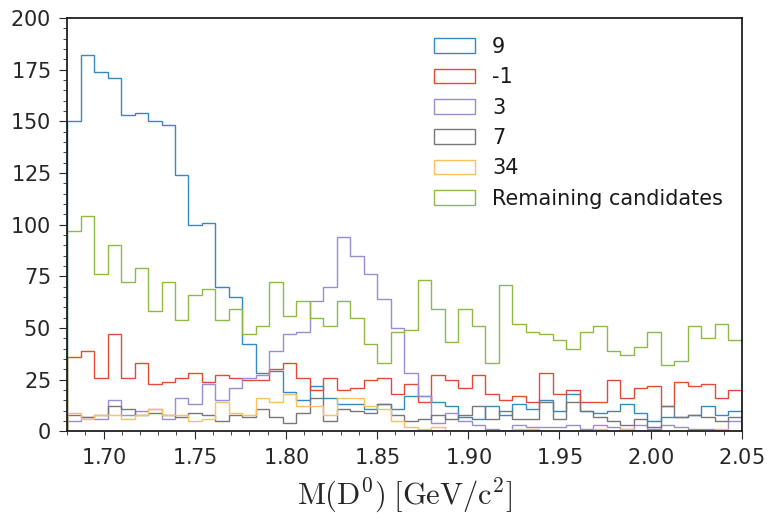

7810


In [58]:


# Assuming you have defined pd_ccbar_others DataFrame and other required variables

bkg_listing = pd_ccbar_others['iCascDcyBrP_Dst_0'].value_counts()

plotted_indices = set()  # To store indices that have been plotted

N_total = 0
for i in range(5):  # Loop from 0 to 5
    decay_chain = bkg_listing.index[i]
    df = pd_ccbar_others[pd_ccbar_others['iCascDcyBrP_Dst_0'] == decay_chain]
    
    N_total += len(df)
    plt.hist(df.D0_M, bins=np.linspace(1.68, 2.05, 51), histtype='step', label=decay_chain)
    
    
    
    plotted_indices.add(decay_chain)

remaining_candidates = [decay_chain for decay_chain in bkg_listing.index if decay_chain not in plotted_indices]

if remaining_candidates:
    remaining_df = pd_ccbar_others[pd_ccbar_others['iCascDcyBrP_Dst_0'].isin(remaining_candidates)]
    
    N_total += len(remaining_df)
    plt.hist(remaining_df.D0_M, bins=np.linspace(1.68, 2.05, 51), histtype='step', label='Remaining candidates')

plt.xlim(1.68, 2.05)
# plt.tight_layout()
plt.legend()
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
plt.tight_layout()

plt.savefig("/media/jykim/T7/saved_plots/DRAW/CALIB/MC15ri/MC15ri_kshortg_1ab_onlyD0_topo_excpet_pi0eta.png")

plt.show()


print(N_total)

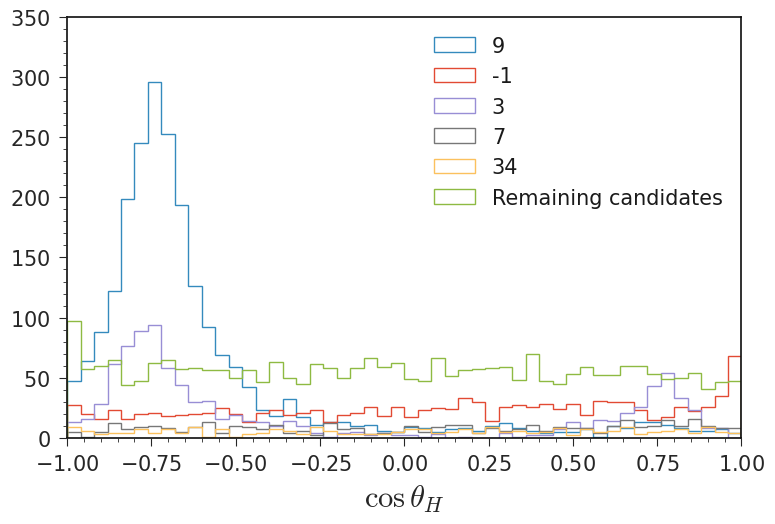

In [59]:

# Assuming you have defined pd_ccbar_others DataFrame and other required variables

bkg_listing = pd_ccbar_others['iCascDcyBrP_Dst_0'].value_counts()

plotted_indices = set()  # To store indices that have been plotted

for i in range(5):  # Loop from 0 to 5
    decay_chain = bkg_listing.index[i]
    df = pd_ccbar_others[pd_ccbar_others['iCascDcyBrP_Dst_0'] == decay_chain]
    plt.hist(df.D0_cosHel_0, bins=np.linspace(-1,1, 51), histtype='step', label=decay_chain)
    plotted_indices.add(decay_chain)

remaining_candidates = [decay_chain for decay_chain in bkg_listing.index if decay_chain not in plotted_indices]

if remaining_candidates:
    remaining_df = pd_ccbar_others[pd_ccbar_others['iCascDcyBrP_Dst_0'].isin(remaining_candidates)]
    plt.hist(remaining_df.D0_cosHel_0, bins=np.linspace(-1,1, 51), histtype='step', label='Remaining candidates')

plt.xlim(-1,1)
plt.legend()
plt.xlabel(r"$\cos\theta_H$")
plt.tight_layout()

plt.savefig("/media/jykim/T7/saved_plots/DRAW/CALIB/MC15ri/MC15ri_kshortg_1ab_onlyD0_topo_excpet_pi0eta_coshel.png")

plt.show()




